<a href="https://colab.research.google.com/github/Sagu12/EnergyManagementResearch/blob/main/Research_Energy_Consumption_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
replace State_Region_corrected.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: State_Region_corrected.csv  
replace file_02.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: file_02.csv             
  inflating: india_states.geojson    
  inflating: region_cordinates.csv   


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
!ls

archive.zip  india_states.geojson   sample_data
file_02.csv  region_cordinates.csv  State_Region_corrected.csv


In [6]:
power_gen= pd.read_csv("/content/file_02.csv")

In [7]:
power_gen.head(2)

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53


In [8]:
power_gen.columns

Index(['index', 'Date', 'Region', 'Thermal Generation Actual (in MU)',
       'Thermal Generation Estimated (in MU)',
       'Nuclear Generation Actual (in MU)',
       'Nuclear Generation Estimated (in MU)',
       'Hydro Generation Actual (in MU)',
       'Hydro Generation Estimated (in MU)'],
      dtype='object')

#Checking the shape of the dataset that is, the number of rows and columns

In [9]:
power_gen.shape

(4945, 9)

#Checking the data type of the columns for our analysis

In [10]:
power_gen.dtypes

index                                     int64
Date                                     object
Region                                   object
Thermal Generation Actual (in MU)        object
Thermal Generation Estimated (in MU)     object
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

#Here we can see that the columns are not evenly categorized in the same data types so we will convert them to a uniform data format that is in integer or float format and will also convert the date column to date time format to carry out the predictive analysis part.

In [11]:
power_gen["Thermal Generation Actual (in MU)"]= power_gen["Thermal Generation Actual (in MU)"].str.replace(',','').astype('float')

In [12]:
power_gen['Thermal Generation Estimated (in MU)']= power_gen['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')

In [13]:
power_gen["Date"]= pd.to_datetime(power_gen["Date"])

In [14]:
power_gen.dtypes

index                                            int64
Date                                    datetime64[ns]
Region                                          object
Thermal Generation Actual (in MU)              float64
Thermal Generation Estimated (in MU)           float64
Nuclear Generation Actual (in MU)              float64
Nuclear Generation Estimated (in MU)           float64
Hydro Generation Actual (in MU)                float64
Hydro Generation Estimated (in MU)             float64
dtype: object

#Checking for NAN values in the dataset

In [15]:
power_gen.isna().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

#Here NAN values basically means that there is no nuclear power genration in the regions therefore we will be replacing these NAN vaues with 0.

In [16]:
power_gen.fillna(0, axis=0, inplace=True)

In [17]:
power_gen.isna().sum()

index                                   0
Date                                    0
Region                                  0
Thermal Generation Actual (in MU)       0
Thermal Generation Estimated (in MU)    0
Nuclear Generation Actual (in MU)       0
Nuclear Generation Estimated (in MU)    0
Hydro Generation Actual (in MU)         0
Hydro Generation Estimated (in MU)      0
dtype: int64

#Using groupby to aggregate the total energy generated in different regions

In [18]:
x=power_gen.groupby(by=['Region'],as_index=False).sum()

In [19]:
x

,Region,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,Eastern,2158427,482123.72,468831.45,0.00,0.00,48686.62,52461.95
1,NorthEastern,2159416,32115.79,33105.95,0.00,0.00,17612.32,14058.66
2,Northern,2155460,655048.26,602168.52,26964.08,31378.94,188854.16,201204.03
3,Southern,2157438,610753.56,543828.71,55855.21,46483.24,71109.34,77083.80
4,Western,2156449,1206631.65,1197394.22,27678.34,31880.85,36235.34,35180.02


In [20]:
x.dtypes

Region                                   object
index                                     int64
Thermal Generation Actual (in MU)       float64
Thermal Generation Estimated (in MU)    float64
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

#Data Visualizations

#Thermal Plots Actual and Estimated

<Figure size 720x720 with 0 Axes>

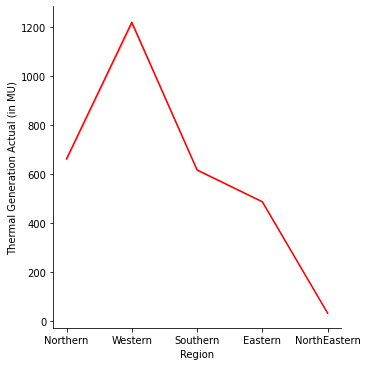

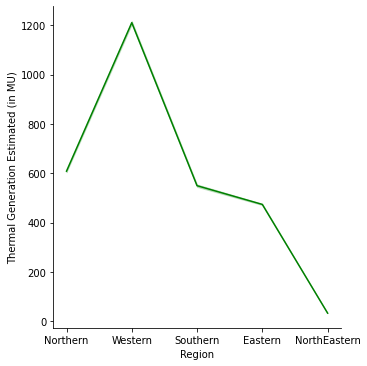

In [21]:
plt.figure(figsize=(10,10))

sns.relplot(x=power_gen.Region, y= power_gen["Thermal Generation Actual (in MU)"], kind="line", color="red")
sns.relplot(x=power_gen.Region, y= power_gen["Thermal Generation Estimated (in MU)"], kind="line", color="green")

plt.show()

Above we can see that the estimated and actual power generation is similar.

#Nuclear Plots Actual and Estimated





<Figure size 1080x720 with 0 Axes>

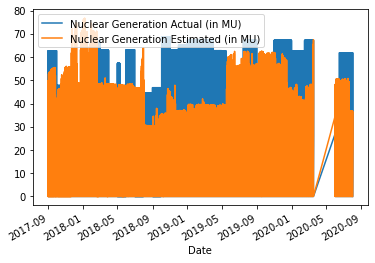

In [22]:
plt.figure(figsize=(15,10))

power_gen.plot(x='Date',y=['Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)'], kind="line")

plt.show()

Above we can see that the estimated power generation is lagging exactness with the actual one and therefore the actual power generated is much higher than estimation 

##Hydro Plots Actual and Estimated


<Figure size 1080x720 with 0 Axes>

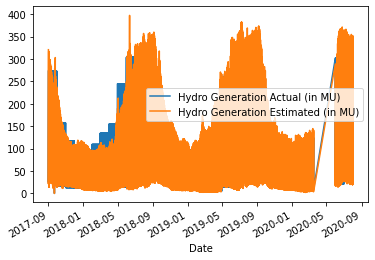

In [23]:
plt.figure(figsize=(15,10))

power_gen.plot(x='Date',y=['Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)'])

plt.show()

Hydro plots actual and estimated looks nearly the same

#Actual Nuclear Power Generation in Different Regions

Text(0, 0.5, 'Nuclear Generation in different regions')

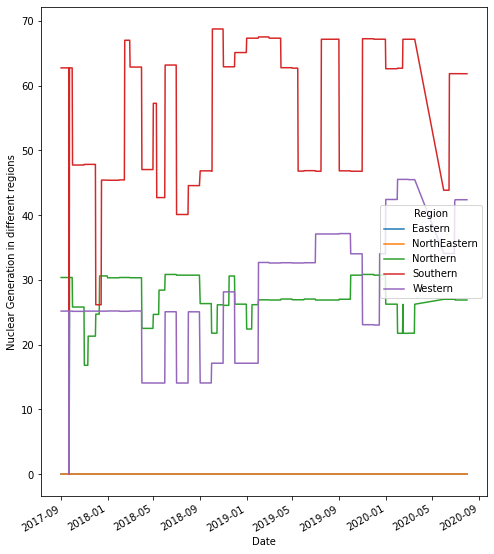

In [24]:
fig, ax = plt.subplots(figsize=(8,10))
power_gen.groupby(['Date','Region']).sum()['Nuclear Generation Actual (in MU)'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Nuclear Generation in different regions')

Here we can see that Southern region has higher nuclear power generated compared to other regions

#Actual Thermal Power Generation in Different Regions




Text(0, 0.5, 'Thermal Generation in different regions')

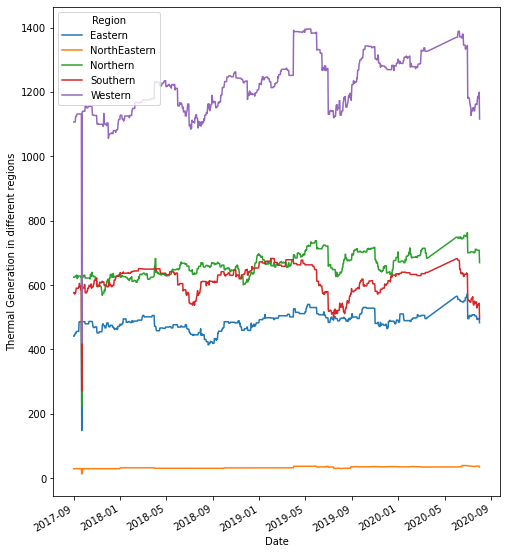

In [25]:
fig, ax = plt.subplots(figsize=(8,10))
power_gen.groupby(['Date','Region']).sum()['Thermal Generation Actual (in MU)'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Thermal Generation in different regions')

Here we can see that Western region dominates in terms of thermal power generation

#Actual Hydro Power Generation in Different Regions


Text(0, 0.5, 'Hydro Generation in different regions')

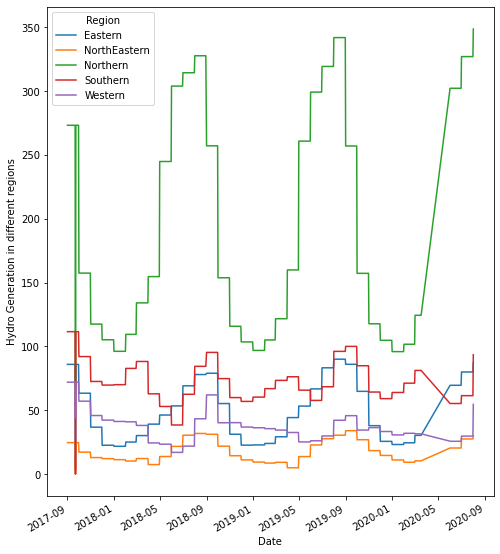

In [26]:
fig, ax = plt.subplots(figsize=(8,10))
power_gen.groupby(['Date','Region']).sum()['Hydro Generation Actual (in MU)'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Hydro Generation in different regions')

Here Northern region dominates in terms of hydro power generation

#Plotting a Pie Plot to see the distribution of all the three energies in the nation

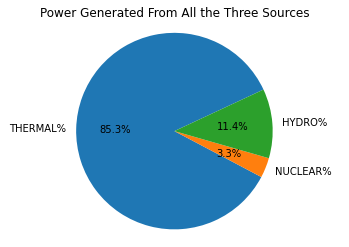

In [27]:
df = [power_gen['Thermal Generation Estimated (in MU)'].sum(),power_gen['Nuclear Generation Estimated (in MU)'].sum(),power_gen['Hydro Generation Estimated (in MU)'].sum()]
labels = 'THERMAL%','NUCLEAR%','HYDRO%'
plt.pie(df, labels=labels, autopct='%1.1f%%', startangle=25)
plt.title('Power Generated From All the Three Sources')
plt.axis('equal')
plt.show()

Above we can see that Thermal is the most dominated power generator compared to to other 2 followed by Hydro and then Nuclear

#Loading the state wise dataset containing the area and national share details

In [28]:
state_wise= pd.read_csv("/content/State_Region_corrected.csv")
state_wise.head()

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


#Grouping the state data as per the regions to get an idea about the area and national share

In [29]:
share = state_wise.groupby('Region').agg('sum')
share = share.reset_index()
share

,Region,Area (km2),National Share (%)
0,Central,443541,13.480
1,Eastern,418336,12.710
2,Northeastern,262179,7.940
3,Northern,889881,27.193
4,Southern,636251,19.330
5,Western,508042,15.440


#Plotting the National Share of Power State Wise

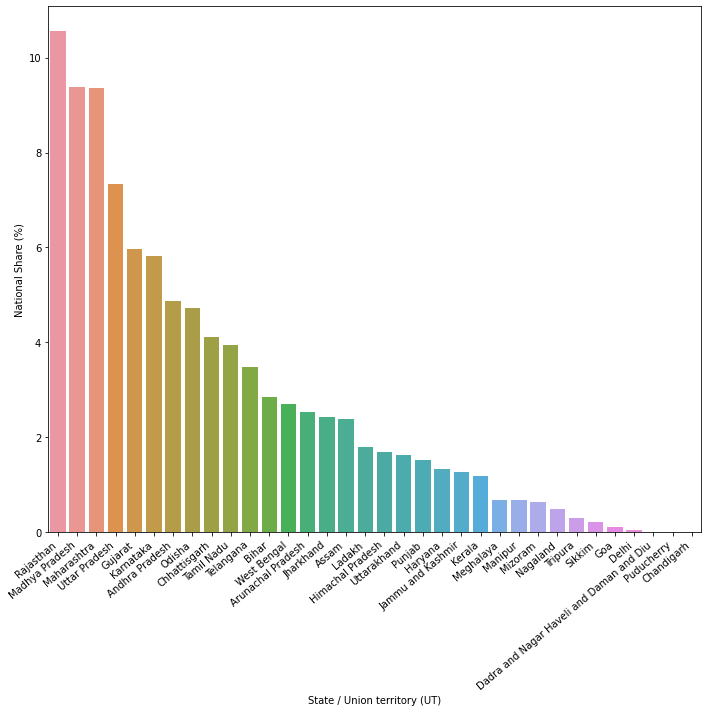

In [30]:
plt.figure(figsize=(10,10))

ax = sns.barplot(x="State / Union territory (UT)", y= "National Share (%)", data= state_wise)


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Above we can see that Rajasthan has the most number of National Share in terms of Power followed by MP, Maharashtra, UP. The least share is contained with Delhi, Chandigarh, Dadra and Nagar Haveli and Daman and Diu.

#Forecasting Future Values of 365 days for Thermal Power 

In [31]:
from fbprophet import Prophet

In [32]:
prophet = power_gen[['Date','Thermal Generation Actual (in MU)']]

In [33]:
prophet.columns= ["ds", "y"]

In [34]:
prophet.head(5)

,ds,y
0,2017-09-01,624.23
1,2017-09-01,1106.89
2,2017-09-01,576.66
3,2017-09-01,441.02
4,2017-09-01,29.11


In [35]:
prophet.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [36]:
model= Prophet()

In [37]:
model.fit(prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)

In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-09-01,566.770795,68.513482,1033.438108,566.770795,566.770795,-18.676501,-18.676501,-18.676501,-2.172779,-2.172779,-2.172779,-16.503722,-16.503722,-16.503722,0.0,0.0,0.0,548.094294
1,2017-09-02,566.848002,26.284769,1009.773944,566.848002,566.848002,-15.789216,-15.789216,-15.789216,-0.400380,-0.400380,-0.400380,-15.388836,-15.388836,-15.388836,0.0,0.0,0.0,551.058786
2,2017-09-03,566.925208,35.528401,1032.706842,566.925208,566.925208,-14.037459,-14.037459,-14.037459,0.309182,0.309182,0.309182,-14.346641,-14.346641,-14.346641,0.0,0.0,0.0,552.887750
3,2017-09-04,567.002415,45.945615,1024.065011,567.002415,567.002415,-12.821186,-12.821186,-12.821186,0.566016,0.566016,0.566016,-13.387203,-13.387203,-13.387203,0.0,0.0,0.0,554.181229
4,2017-09-05,567.079622,62.986429,1050.055298,567.079622,567.079622,-11.762970,-11.762970,-11.762970,0.755076,0.755076,0.755076,-12.518045,-12.518045,-12.518045,0.0,0.0,0.0,555.316652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,2021-07-28,676.859588,138.599347,1134.995246,676.859189,676.860017,-43.336207,-43.336207,-43.336207,0.337648,0.337648,0.337648,-43.673855,-43.673855,-43.673855,0.0,0.0,0.0,633.523381
1350,2021-07-29,676.936786,150.352041,1149.551288,676.936386,676.937217,-41.845619,-41.845619,-41.845619,0.605237,0.605237,0.605237,-42.450856,-42.450856,-42.450856,0.0,0.0,0.0,635.091167
1351,2021-07-30,677.013984,142.351117,1120.478153,677.013583,677.014416,-43.464697,-43.464697,-43.464697,-2.172779,-2.172779,-2.172779,-41.291918,-41.291918,-41.291918,0.0,0.0,0.0,633.549287
1352,2021-07-31,677.091182,167.884230,1125.990019,677.090780,677.091616,-40.612851,-40.612851,-40.612851,-0.400380,-0.400380,-0.400380,-40.212471,-40.212471,-40.212471,0.0,0.0,0.0,636.478331


In [40]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-09-01,548.094294,68.513482,1033.438108
1,2017-09-02,551.058786,26.284769,1009.773944
2,2017-09-03,552.887750,35.528401,1032.706842
3,2017-09-04,554.181229,45.945615,1024.065011
4,2017-09-05,555.316652,62.986429,1050.055298


In [43]:
fore= forecast[["ds","yhat","yhat_lower","yhat_upper"]]

In [44]:
fore.to_csv("forecasted_energy.csv")

#Graphical representation of the predicted output

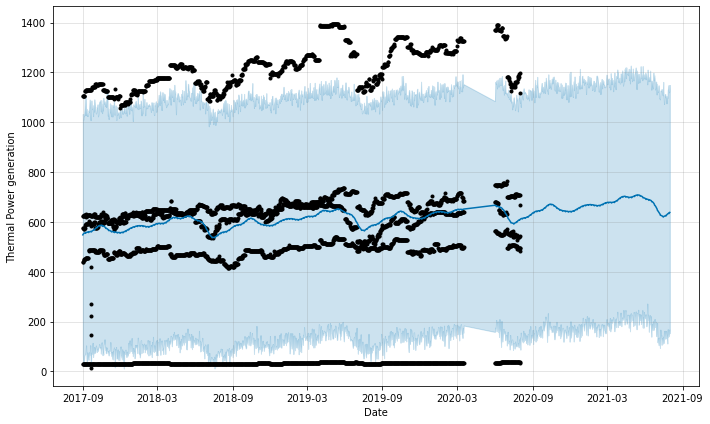

In [41]:
ther= model.plot(forecast, xlabel = 'Date', ylabel = 'Thermal Power generation')

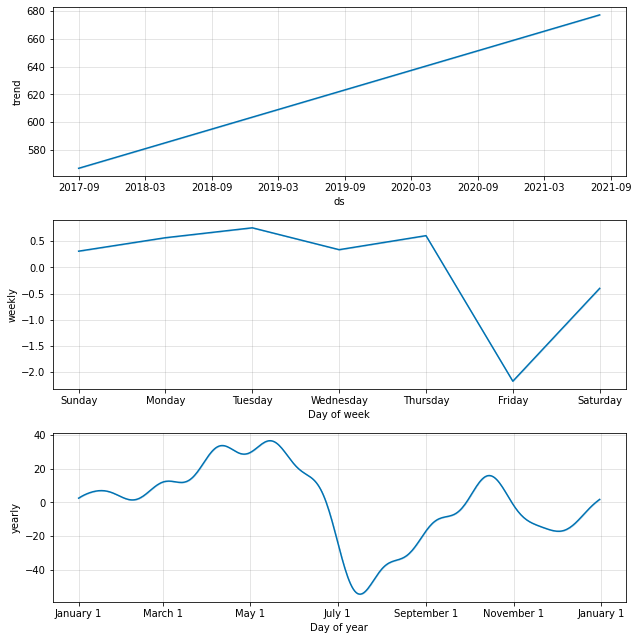

In [42]:
plot= model.plot_components(forecast)

By above analysis it can be inferred that the dependency on coal for energy production will increase in the upcoming years as per the trend analysis which is a bad sign. This is due the fact 